In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import scipy.stats as stats
import pprint
%matplotlib inline

parameter,w,p
radius , 0.7373224496841431 , 1.0463088631883277e-17


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


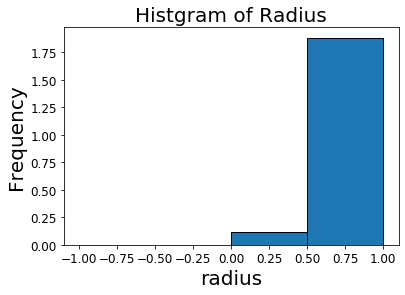

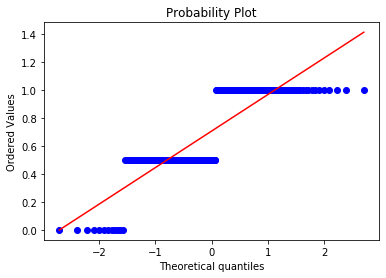

theta , 0.9142007231712341 , 1.6950806314142142e-09


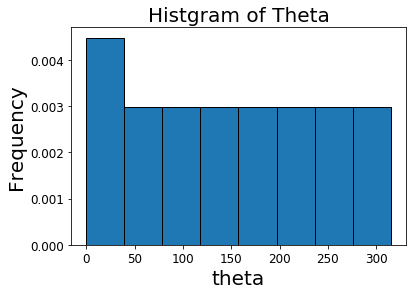

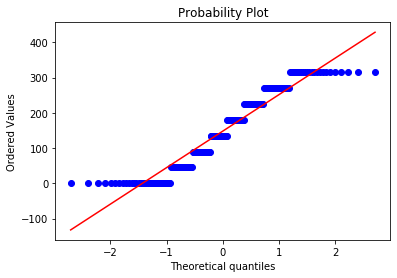

valence , 0.9583324193954468 , 1.078647437680047e-05


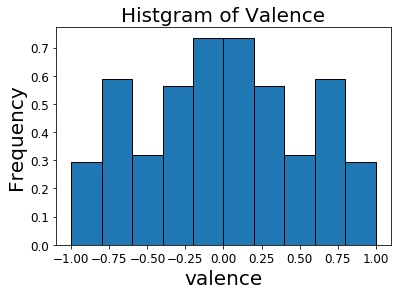

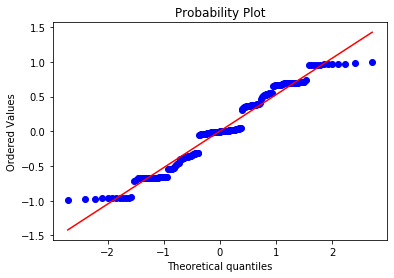

arousal , 0.9622411131858826 , 2.89645522570936e-05


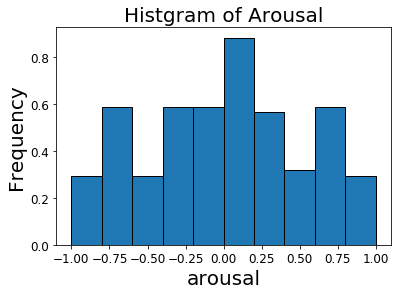

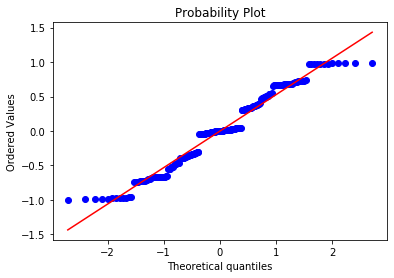

sliderThetaSub , 0.9826727509498596 , 0.012971254996955395


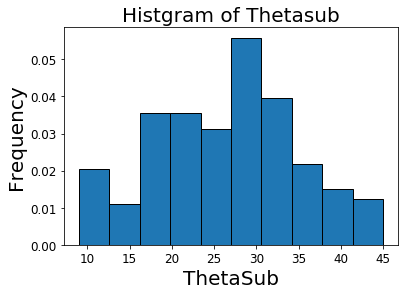

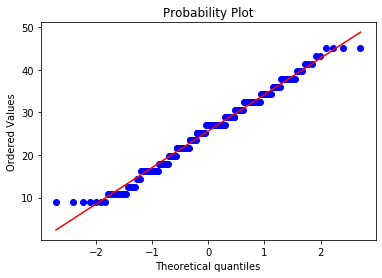

sliderVertexNum , 0.9071284532546997 , 5.508945521981445e-10


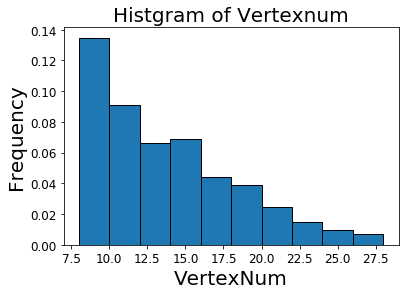

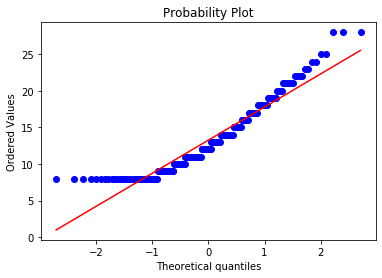

sliderLengthCoefficient , 0.9724532961845398 , 0.0004924265085719526


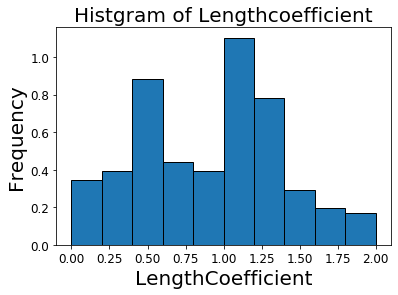

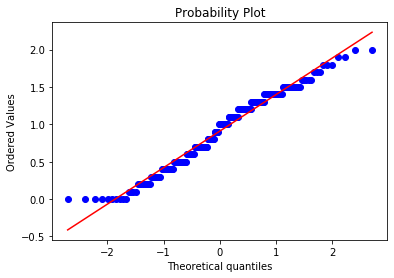

sliderAmplitude , 0.9735970497131348 , 0.000693968846462667


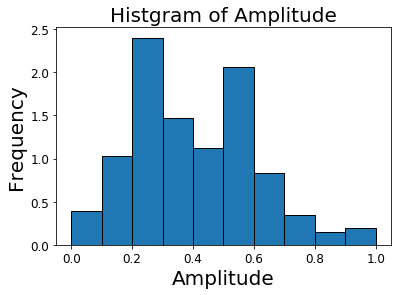

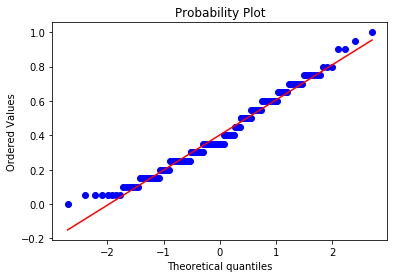

sliderThetaBeat , 0.9698654413223267 , 0.00023122239508666098


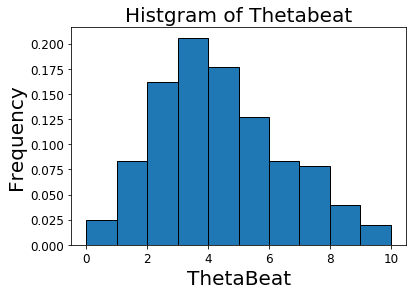

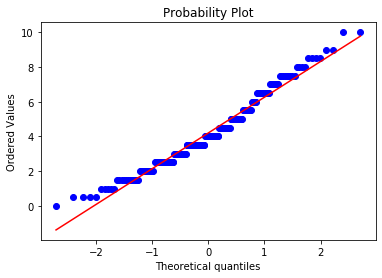

sliderHue , 0.8851253390312195 , 2.2955368508825735e-11


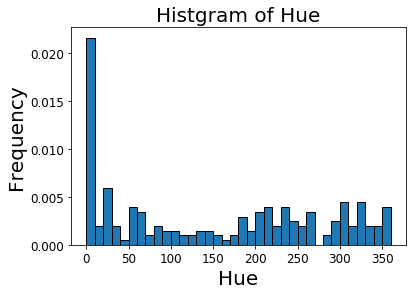

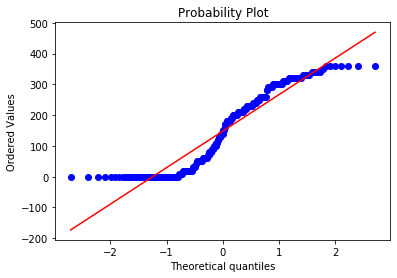

In [9]:
path = "./data/pilot_study/csv/each_parameter/df_each_parameter_nohue.csv"
out_path = "./data/pilot_study/csv/each_parameter/"
each_parameter_list = pd.read_csv(path, header=0, index_col=0)
index_list = each_parameter_list.index.values
split_rate = 10
range_map = {
    "radius": {
        "min": -1,
        "max": 1,
        "bins": 4
    },
    "theta": {
        "min": 0,
        "max": 360 - 45,
        "bins": 360/45
    },
    "valence": {
        "min": -1,
        "max": 1,
        "bins": 10
    },
    "arousal": {
        "min": -1,
        "max": 1,
        "bins": 10
    },
    "sliderThetaSub": {
        "min": 9,
        "max": 45,
        "bins": split_rate
    },
    "sliderVertexNum": {
        "min": 8,
        "max": 28,
        "bins": split_rate
    },
    "sliderLengthCoefficient": {
        "min": 0,
        "max": 2,
        "bins": split_rate
    },
    "sliderAmplitude": {
        "min": 0,
        "max": 1,
        "bins": split_rate
    },
    "sliderThetaBeat": {
        "min": 0,
        "max": 10,
        "bins": split_rate
    },
    "sliderHue": {
        "min": 0,
        "max": 360,
        "bins": 36
    }
}
# for redirecting
import sys
# sys.stdout = open(out_path + "parameter_shapiro_test.csv", "w")
print("parameter,w,p")
for il in index_list:
    # calc Shapiro-Wilk test
    out_tuple = stats.shapiro(each_parameter_list.loc[il].values)
    print(il, ",", out_tuple[0], ",", out_tuple[1])
    dist = each_parameter_list.loc[il]
    # plot as histgram
    plt.title("Histgram of " + il.replace("slider", "").capitalize(), fontsize=20)
    plt.tick_params(labelsize = 12) 
    plt.xlabel(il.replace("slider", ""), fontsize=20)
    plt.ylabel("Frequency", fontsize=20)
    plt.hist(dist, ec='black', bins=int(range_map[il]["bins"]), range=(range_map[il]["min"], range_map[il]["max"]), normed=True)
    # draw
    plt.show()
    stats.probplot(dist, dist="norm", plot=plt)
    plt.show()